Rucellie and Bruce

Part 1 Starts Here

In [19]:
# The standard fare:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.visualization import ZScaleInterval
%matplotlib inline
# Recall our use of this module to work with FITS files in Lab 4:
from astropy.io import fits 

# This lets us use various Unix (or Unix-like) commands within Python:
import os 

# We will see what this does shortly.
import glob 
import astropy.time

import astropy.stats as stat
from astropy.stats import mad_std
from astropy.stats import sigma_clip
from photutils.utils import calc_total_error
import astropy.stats as stat
plt.rcParams['figure.dpi'] = 300

from photutils import aperture_photometry, CircularAperture, CircularAnnulus, DAOStarFinder

In [20]:
VCasdata = np.loadtxt('SV_Vul_LightCurve.txt', float,skiprows=1) # read into 2D array


Text(0.5, 1.0, 'SV Vul Various Observations')

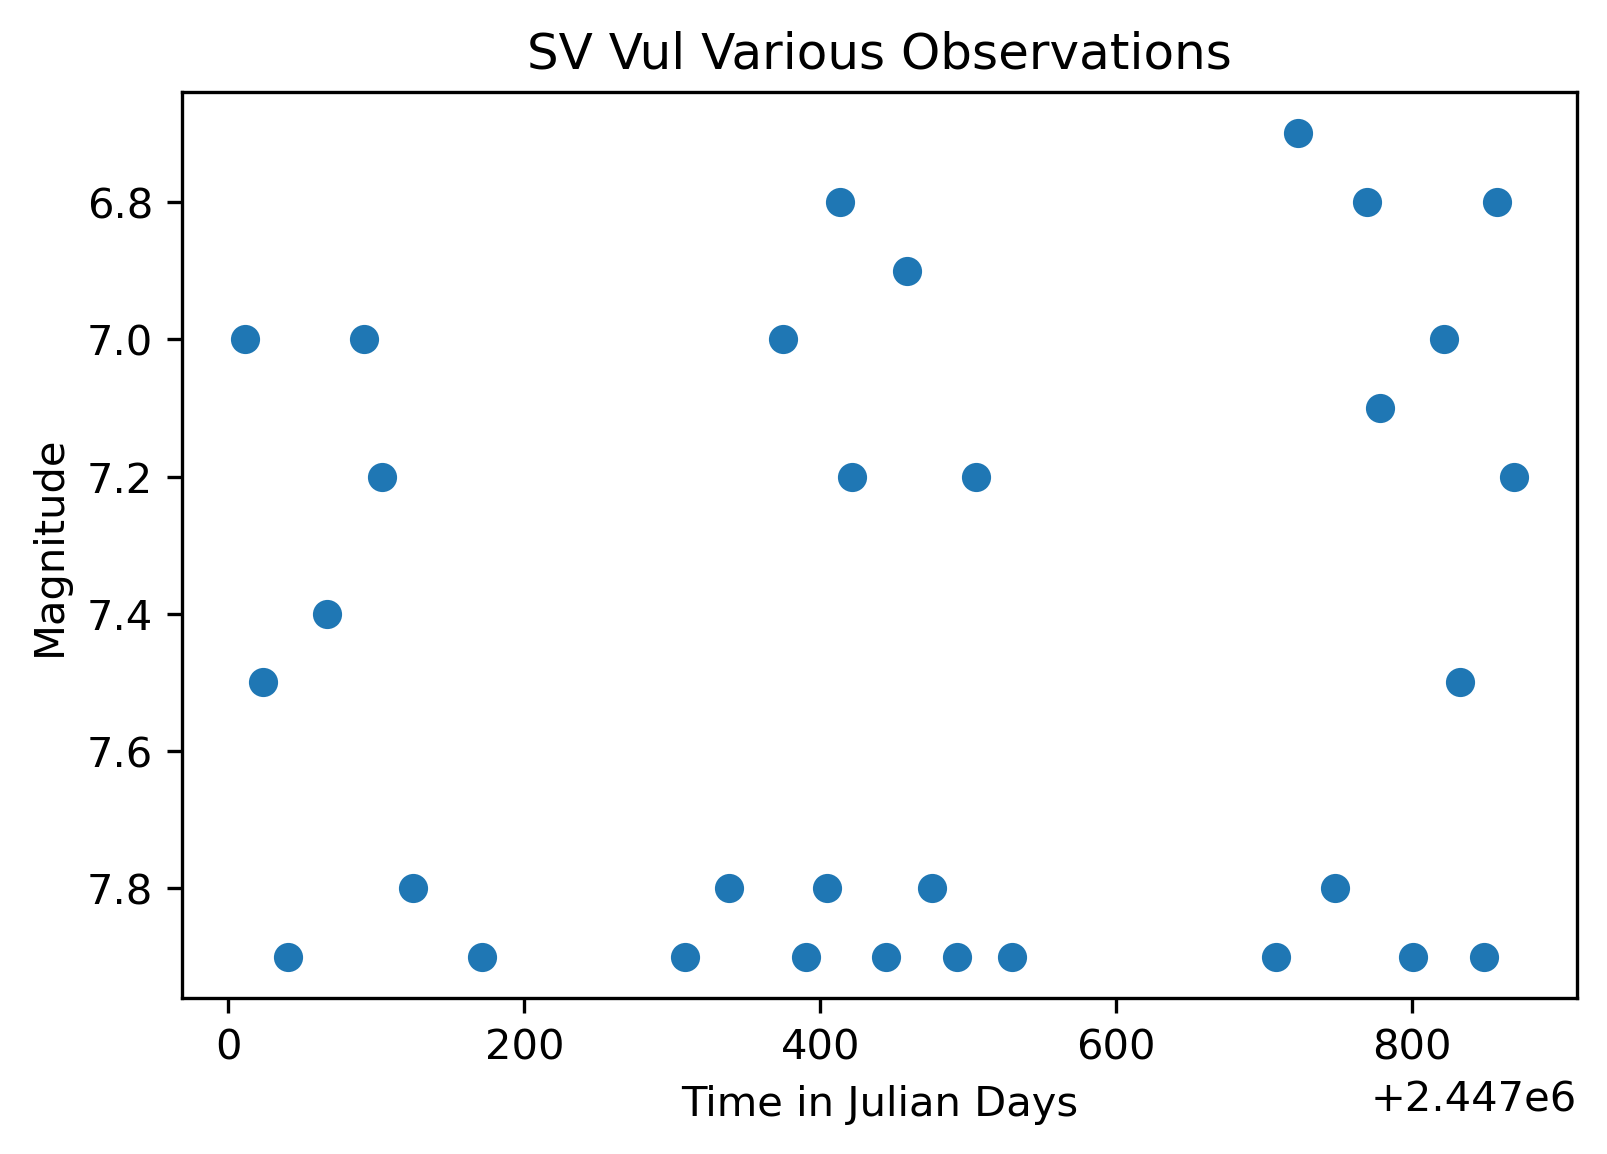

In [21]:
plt.scatter(VCasdata[:,0], VCasdata[:,1])
plt.gca().invert_yaxis()
plt.xlabel('Time in Julian Days')
plt.ylabel('Magnitude')
plt.title('SV Vul Various Observations')

No easily discernable phase, data sort of looks as if it is concentrated in three 'pillars'. 

In [22]:
period = 44.8

In [23]:
t_0 = VCasdata[:,0][0]
subtracted_array = []
for i in VCasdata[:,0]:
    value = ((i-t_0)/(period))%1
    subtracted_array.append(value)
    

In [24]:
from scipy.optimize import curve_fit
# Define the model function
def f(x,p0,p1,p2):
    ymod = p0*np.sin(x+p1)+p2
    return ymod
# Use curve_fit to fit the data
guesses = (0,0,0)   # parameter guesses
(p0,p1,p2),cc = curve_fit(f,subtracted_array,VCasdata[:,1],p0=guesses)
xmin = min(subtracted_array)
xmax = max(subtracted_array)
xmod = np.linspace(xmin,xmax,500)
ymod = f(xmod,p0,p1,p2)

Text(0.5, 1.0, 'SV Vul Phase Folded Light Curve Fitted with Sin curve')

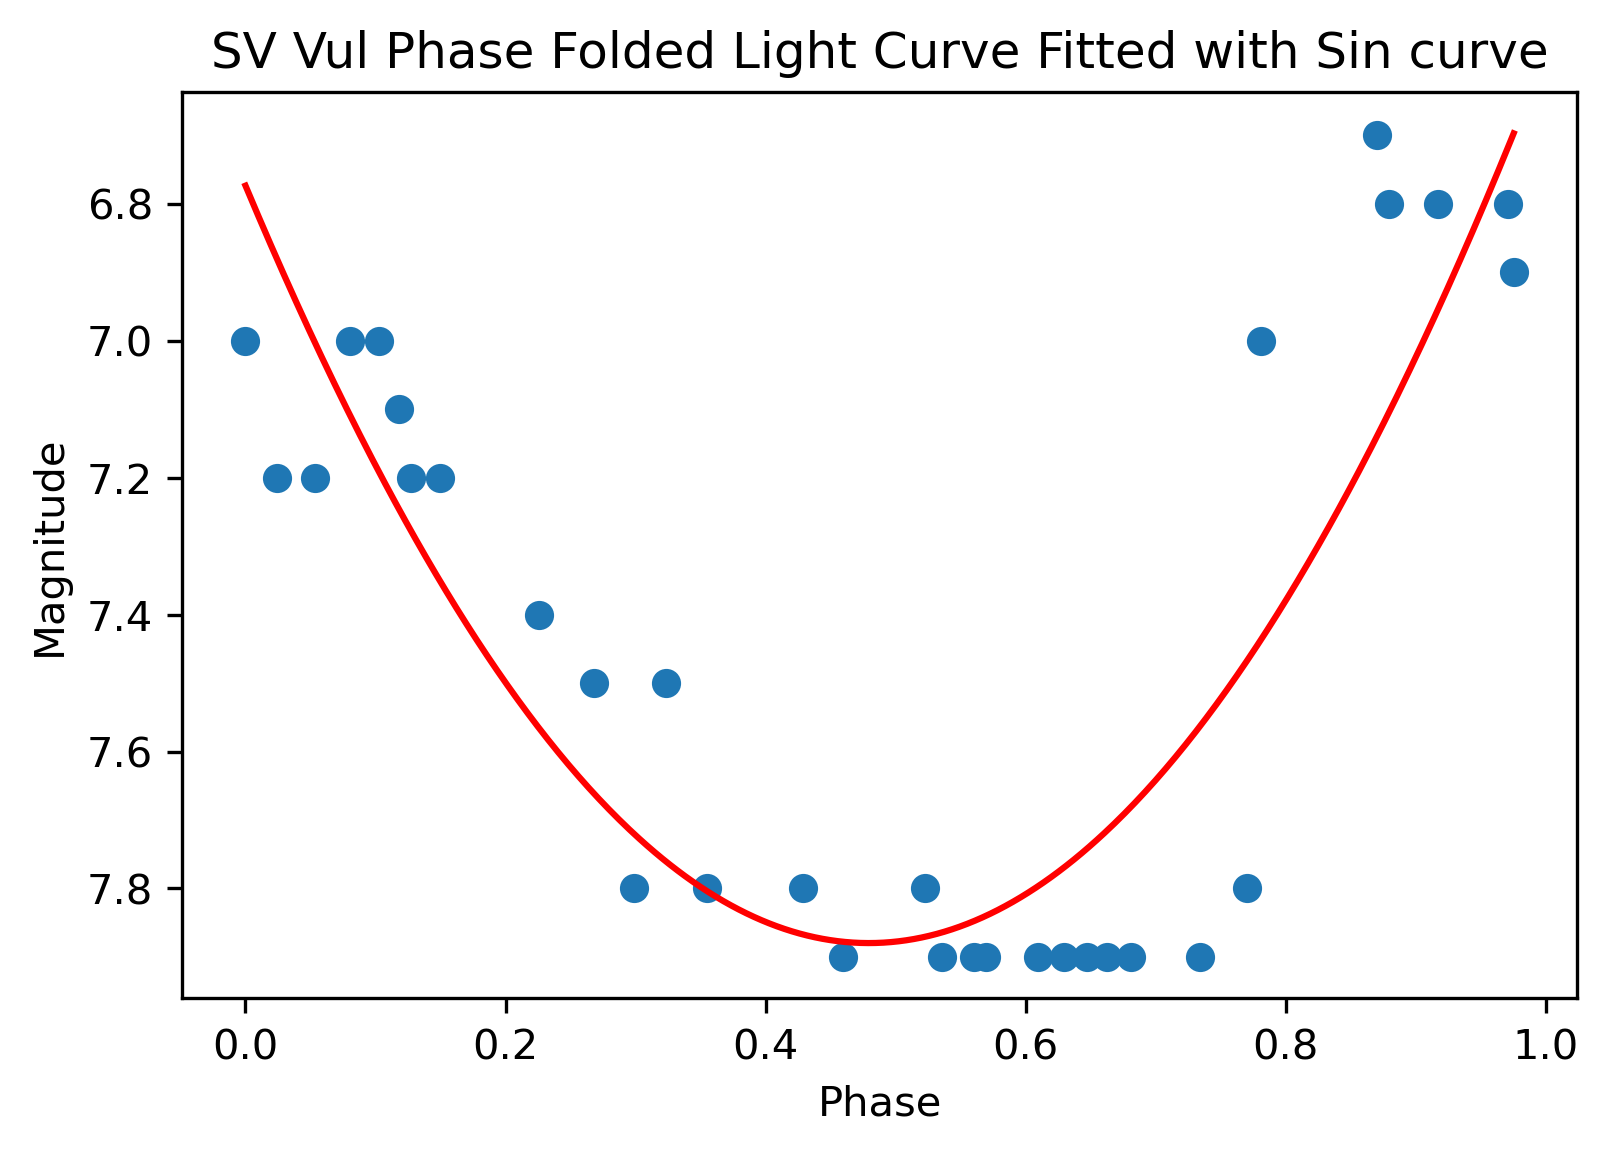

In [25]:
plt.scatter(subtracted_array, VCasdata[:,1])
plt.plot(xmod,ymod,'r')
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('SV Vul Phase Folded Light Curve Fitted with Sin curve')

Part 2 Begins Here

In [26]:
magnitudes_double=[]
for i in VCasdata[:,1]:
    magnitudes_double.append(i)
for i in VCasdata[:,1]:
    magnitudes_double.append(i)

In [27]:
complete_array = []
subtracted_subtractedarray = subtracted_array - np.ones(len(subtracted_array))
for i in subtracted_subtractedarray:
    complete_array.append(i)
for i in subtracted_array:
    complete_array.append(i)

Text(0.5, 1.0, 'SV Vul Phase Folded Light Curve, two phases')

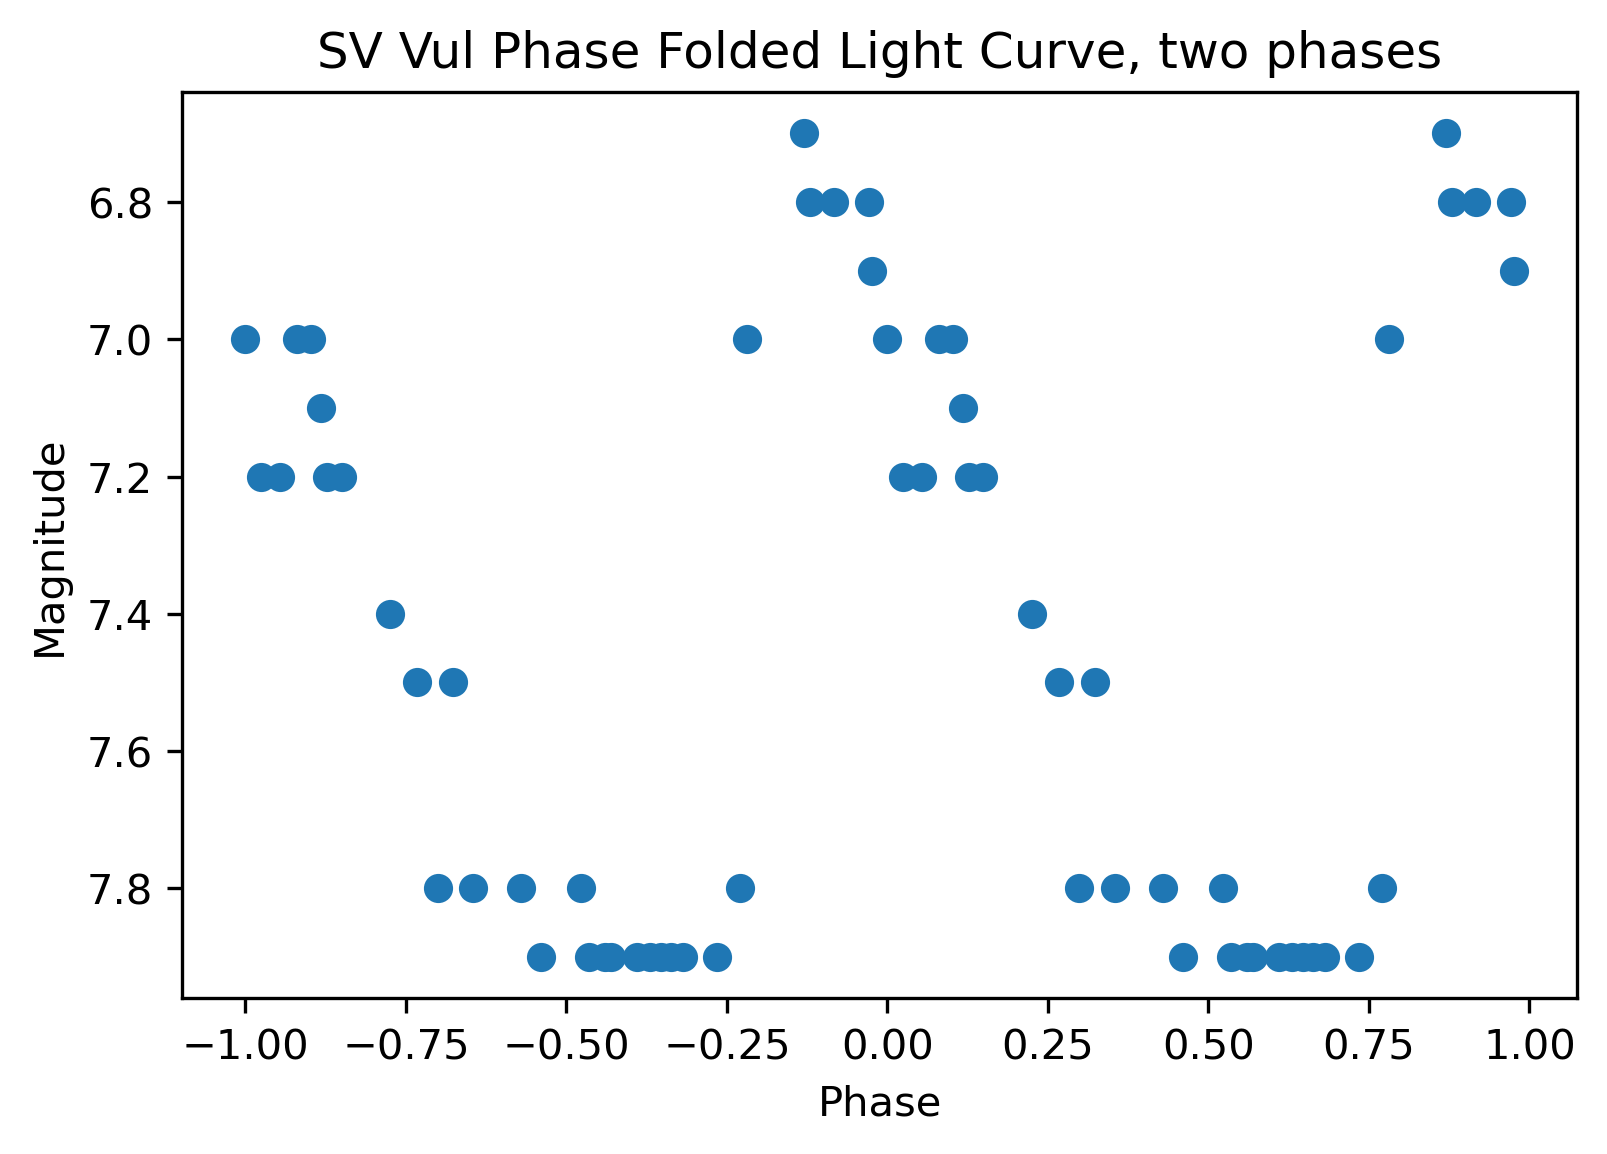

In [28]:
# plt.scatter(subtracted_subtractedarray, VCasdata[:,1]) 
# plt.scatter(subtracted_array, VCasdata[:,1])
plt.scatter(complete_array, magnitudes_double)
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('SV Vul Phase Folded Light Curve, two phases')


The data appears to be continous, and we can observe two complete cycles one after the other. There appears to be a discernable pattern and not much scatter. It appears as though the trend of datapoints could definitely be fit to a smooth curve. 

Part 3 Begins Here.

In [29]:
complete_array = np.array(complete_array)
largest = np.max(complete_array)
t_0_new = VCasdata[:,0][np.argmin(VCasdata[:,1])]
print(t_0_new)

2447722.6


In [30]:
new_zeropoint_array = []
for i in VCasdata[:,0]:
    value = ((i-t_0_new)/(period))%1
    print(i - t_0_new)
    print((i - t_0_new)/period)
    print()
    new_zeropoint_array.append(value)
new_zeropoint_array_subtracted = new_zeropoint_array - np.ones(len(new_zeropoint_array))

-711.0
-15.870535714285715

-699.0
-15.602678571428573

-682.0
-15.223214285714286

-656.1000000000931
-14.645089285716365

-631.2000000001863
-14.089285714289874

-619.0
-13.816964285714286

-598.0
-13.348214285714286

-551.1000000000931
-12.301339285716365

-414.0
-9.241071428571429

-384.0
-8.571428571428571

-348.0
-7.767857142857143

-332.0
-7.4107142857142865

-318.10000000009313
-7.100446428573508

-309.10000000009313
-6.89955357143065

-301.10000000009313
-6.7209821428592225

-278.10000000009313
-6.207589285716365

-264.10000000009313
-5.895089285716365

-247.10000000009313
-5.515625000002079

-230.10000000009313
-5.136160714287794

-217.10000000009313
-4.845982142859222

-193.10000000009313
-4.310267857144936

-15.0
-0.3348214285714286

0.0
0.0

25.0
0.5580357142857143

46.89999999990687
1.0468749999979212

55.89999999990687
1.2477678571407784

77.89999999990687
1.738839285712207

99.0
2.209821428571429

109.89999999990687
2.453124999997921

125.89999999990687
2.81026785714077

Text(0.5, 1.0, 'SV Vul Phase Folded Light Curve, two phases, highest magnitude in single cycle chosen as T_0')

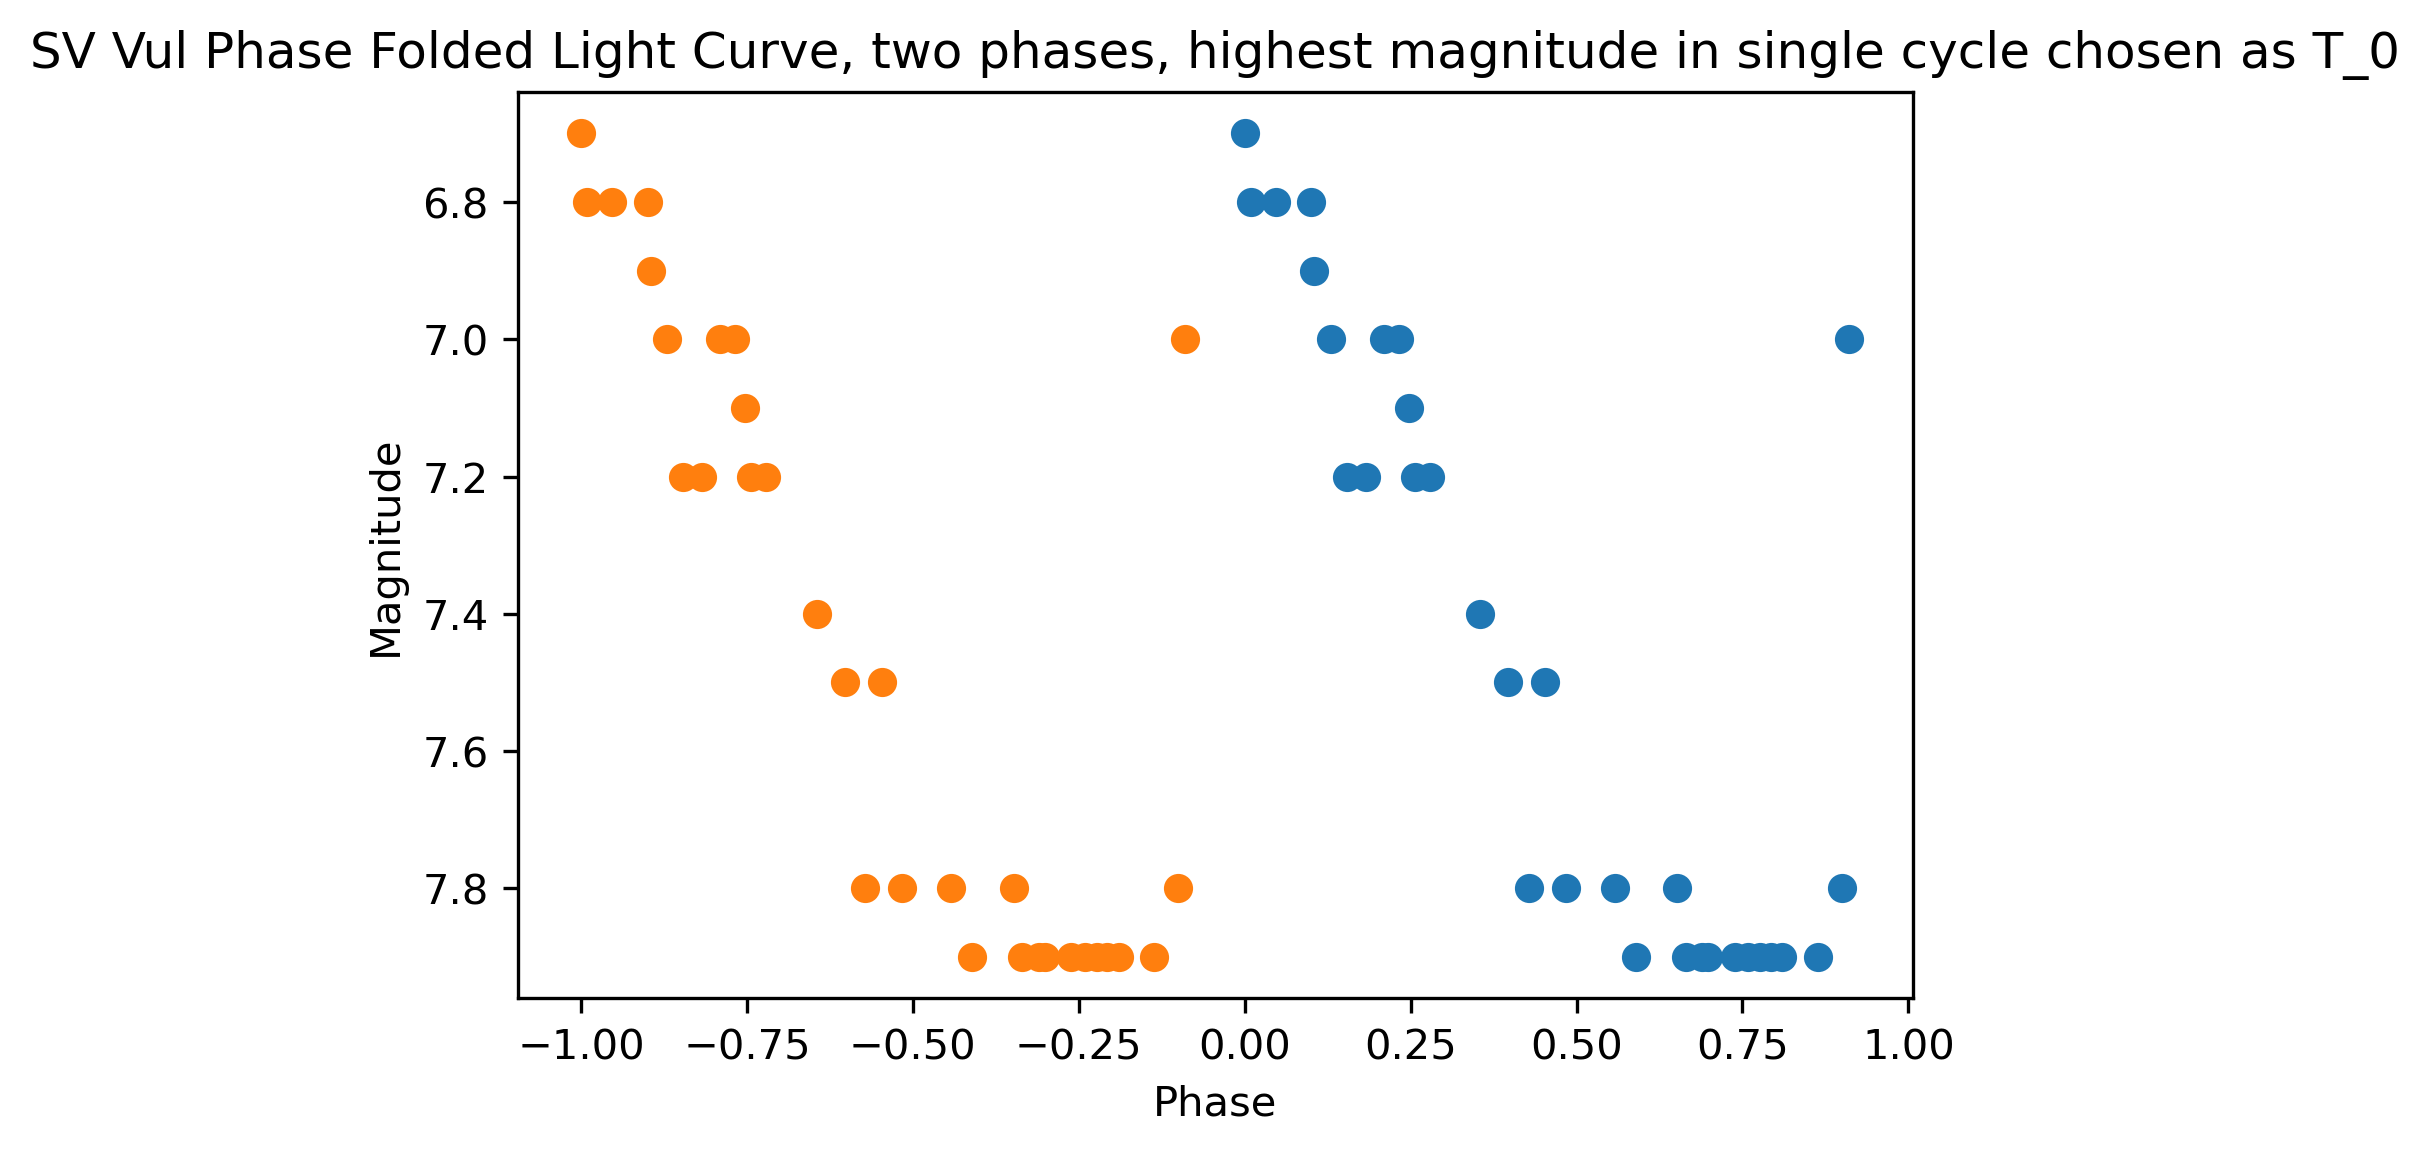

In [33]:
plt.scatter(new_zeropoint_array, VCasdata[:,1])
plt.scatter(new_zeropoint_array_subtracted, VCasdata[:,1])
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('SV Vul Phase Folded Light Curve, two phases, highest magnitude in single cycle chosen as T_0')

In [32]:
new_zeropoint_array_subtracted

array([-0.87053571, -0.60267857, -0.22321429, -0.64508929, -0.08928571,
       -0.81696429, -0.34821429, -0.30133929, -0.24107143, -0.57142857,
       -0.76785714, -0.41071429, -0.10044643, -0.89955357, -0.72098214,
       -0.20758929, -0.89508929, -0.515625  , -0.13616071, -0.84598214,
       -0.31026786, -0.33482143, -1.        , -0.44196429, -0.953125  ,
       -0.75223214, -0.26116071, -0.79017857, -0.546875  , -0.18973214,
       -0.99107143, -0.74330357])